In [ ]:
try:
  # Colab only
  %tensorflow_version 2.x
except Exception:
    pass
import tensorflow as tf
print(tf.__version__)

Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.
2.9.2


In [ ]:
import tensorflow.keras as keras
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Reshape, MaxPooling2D
from tensorflow.keras import backend as K
from tensorflow.keras.utils import to_categorical

In [ ]:
num_classes=10 # 0, 1, 2, 3, 4, 5, 6, 7, 8, 9
# input image dimensions
img_rows, img_cols = 28, 28

# the data, split between train and test sets
(x_train, y_train_orig), (x_test, y_test_orig) = mnist.load_data()

if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

# convert class vectors to binary class matrices
y_train = to_categorical(y_train_orig, num_classes)
y_test = to_categorical(y_test_orig, num_classes)

11490434/11490434 [==============================] - 0s 0us/step
x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


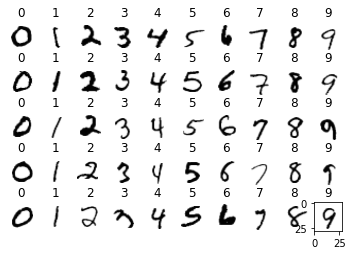

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

for i in range(10):
  num_digits=5
  indices=np.random.choice(np.where(y_train_orig==i)[0],num_digits)
  for j in range(num_digits):
    plt.axis('off')
    plt.subplot(num_digits,10,10*j+i+1).set_title('{}'.format(i))
    plt.imshow(x_train[indices[j],:,:,0], cmap='Greys')
plt.show()

In [ ]:
indexes = np.random.permutation(len(x_train))
train_data = x_train[indexes]
train_labels = y_train[indexes]

val_count = int(0.1 * len(x_train))
x_val = train_data[:val_count,:]
y_val = train_labels[:val_count,:]

# leave rest in training set
part_x_train = train_data[val_count:,:]
part_y_train = train_labels[val_count:,:]

In [ ]:
print(part_x_train.shape,part_y_train.shape,y_val.shape,x_val.shape)

(54000, 28, 28, 1) (54000, 10) (6000, 10) (6000, 28, 28, 1)
